# KNN with scikit-learn - Lab

## Introduction

In this lab, you'll learn how to use scikit-learn's implementation of a KNN classifier on the classic Titanic dataset from Kaggle!
 

## Objectives

In this lab you will:

- Conduct a parameter search to find the optimal value for K 
- Use a KNN classifier to generate predictions on a real-world dataset 
- Evaluate the performance of a KNN model  


## Getting Started

Start by importing the dataset, stored in the `titanic.csv` file, and previewing it.

In [1]:
# Your code here
# Import pandas and set the standard alias 

import pandas as pd

# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
raw_df = pd.read_csv('titanic.csv')

# Print the head of the DataFrame to ensure everything loaded correctly 
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
raw_df.size
raw_df.shape
raw_df.columns
raw_df.index

RangeIndex(start=0, stop=891, step=1)

Great!  Next, you'll perform some preprocessing steps such as removing unnecessary columns and normalizing features.

## Preprocessing the data

Preprocessing is an essential component in any data science pipeline. It's not always the most glamorous task as might be an engaging data visual or impressive neural network, but cleaning and normalizing raw datasets is very essential to produce useful and insightful datasets that form the backbone of all data powered projects. This can include changing column types, as in: 


```python
df['col_name'] = df['col_name'].astype('int')
```
Or extracting subsets of information, such as: 

```python
import re
df['street'] = df['address'].map(lambda x: re.findall('(.*)?\n', x)[0])
```

> **Note:** While outside the scope of this particular lesson, **regular expressions** (mentioned above) are powerful tools for pattern matching! See the [regular expressions official documentation here](https://docs.python.org/3.6/library/re.html). 

Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:

1. Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) 
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

In [3]:
# Drop the unnecessary columns
df = raw_df.drop(['PassengerId', 'Name', 'Ticket',  'Cabin'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [5]:
# Convert Sex to binary encoding
df['Sex'] = pd.get_dummies(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [6]:
# Find the number of missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null uint8
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 49.7+ KB


In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df['Age'].median()

28.0

In [10]:
# Impute the missing values in 'Age'
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
df.loc[df['Embarked'].isna()== 1]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,80.0,NaN
829,1,1,1,62.0,0,0,80.0,NaN


In [12]:
# Drop the rows missing values in the 'Embarked' column
df = df.dropna()
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [14]:
# One-hot encode the categorical columns
one_hot_df = pd.get_dummies(df)
one_hot_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [15]:
# Assign the 'Survived' column to labels
labels = one_hot_df['Survived']


# Drop the 'Survived' column from one_hot_df
one_hot_df.drop('Survived',axis=1,inplace=True)

## Create training and test sets

Now that you've preprocessed the data, it's time to split it into training and test sets. 

In the cell below:

* Import `train_test_split` from the `sklearn.model_selection` module 
* Use `train_test_split()` to split the data into training and test sets, with a `test_size` of `0.25`. Set the `random_state` to 42 

In [16]:
who

df	 labels	 one_hot_df	 pd	 raw_df	 


In [17]:
labels
one_hot_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,3,1,28.0,1,2,23.4500,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0


In [18]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, test_size=0.25, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((666, 9), (223, 9), (666,), (223,))

In [20]:
889/4


222.25

## Normalizing the data

The final step in your preprocessing efforts for this lab is to **_normalize_** the data. We normalize **after** splitting our data into training and test sets. This is to avoid information "leaking" from our test set into our training set (read more about data leakage [here](https://machinelearningmastery.com/data-leakage-machine-learning/) ). Remember that normalization (also sometimes called **_Standardization_** or **_Scaling_**) means making sure that all of your data is represented at the same scale. The most common way to do this is to convert all numerical values to z-scores. 

Since KNN is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.

To scale your data, use `StandardScaler` found in the `sklearn.preprocessing` module. 

In the cell below:

* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

In [21]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train,columns = one_hot_df.columns)
scaled_df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.815528,1.390655,-0.575676,-0.474917,-0.480663,-0.500108,-0.483046,-0.311768,0.620174
1,-0.386113,1.390655,1.550175,-0.474917,-0.480663,-0.435393,-0.483046,-0.311768,0.620174
2,-0.386113,-0.719086,-0.120137,-0.474917,-0.480663,-0.644473,-0.483046,-0.311768,0.620174
3,-1.587755,-0.719086,-0.120137,-0.474917,-0.480663,-0.115799,-0.483046,-0.311768,0.620174
4,0.815528,1.390655,-1.107139,0.413551,-0.480663,-0.356656,2.070197,-0.311768,-1.612452


In [22]:
scaled_df_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02,6.660000e+02
mean,5.334405e-17,2.667202e-17,-8.535048e-17,-5.734485e-17,-2.667202e-17,4.034144e-17,-4.267524e-17,-2.000402e-17,-1.066881e-17
std,1.000752e+00,1.000752e+00,1.000752e+00,1.000752e+00,1.000752e+00,1.000752e+00,1.000752e+00,1.000752e+00,1.000752e+00
min,-1.587755e+00,-7.190857e-01,-2.214100e+00,-4.749166e-01,-4.806630e-01,-6.444731e-01,-4.830459e-01,-3.117681e-01,-1.612452e+00
25%,-3.861130e-01,-7.190857e-01,-5.756760e-01,-4.749166e-01,-4.806630e-01,-4.872489e-01,-4.830459e-01,-3.117681e-01,-1.612452e+00
50%,8.155285e-01,-7.190857e-01,-1.201366e-01,-4.749166e-01,-4.806630e-01,-3.557436e-01,-4.830459e-01,-3.117681e-01,6.201737e-01
75%,8.155285e-01,1.390655e+00,4.872494e-01,4.135510e-01,-4.806630e-01,-3.714547e-02,-4.830459e-01,-3.117681e-01,6.201737e-01
max,8.155285e-01,1.390655e+00,3.827872e+00,6.632825e+00,6.878453e+00,9.557221e+00,2.070197e+00,3.207512e+00,6.201737e-01


In [28]:
scaled_df_train.median()

Pclass        0.815528
Sex          -0.719086
Age          -0.120137
SibSp        -0.474917
Parch        -0.480663
Fare         -0.355744
Embarked_C   -0.483046
Embarked_Q   -0.311768
Embarked_S    0.620174
dtype: float64

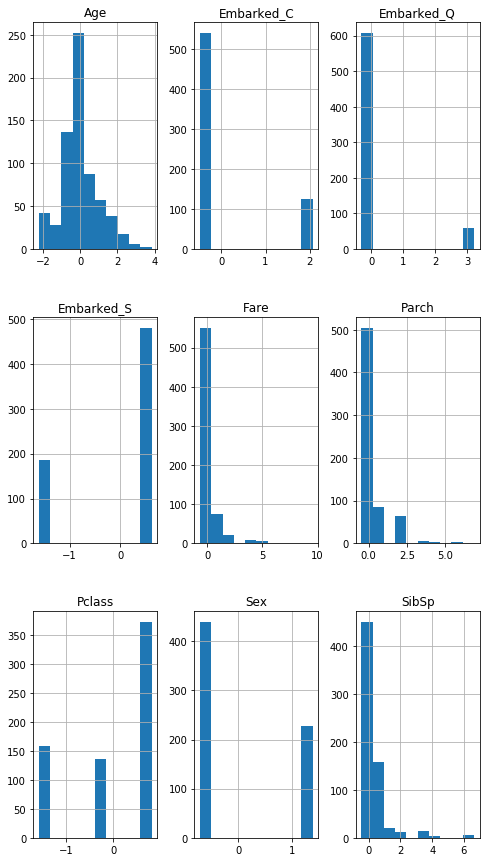

In [27]:
import matplotlib.pyplot as plt
scaled_df_train.hist(figsize=(8,15))
plt.show()

You may have noticed that the scaler also scaled our binary/one-hot encoded columns, too! Although it doesn't look as pretty, this has no negative effect on the model. Each 1 and 0 have been replaced with corresponding decimal values, but each binary column still only contains 2 values, meaning the overall information content of each column has not changed.

## Fit a KNN model

Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy. 

In the cells below:

* Import `KNeighborsClassifier` from the `sklearn.neighbors` module 
* Instantiate the classifier. For now, you can just use the default parameters  
* Fit the classifier to the training data/labels
* Use the classifier to generate predictions on the test data. Store these predictions inside the variable `test_preds` 

In [ ]:
# Import KNeighborsClassifier


# Instantiate KNeighborsClassifier
clf = None

# Fit the classifier


# Predict on the test set
test_preds = None

## Evaluate the model

Now, in the cells below, import all the necessary evaluation metrics from `sklearn.metrics` and complete the `print_metrics()` function so that it prints out **_Precision, Recall, Accuracy, and F1-Score_** when given a set of `labels` (the true values) and `preds` (the models predictions). 

Finally, use `print_metrics()` to print the evaluation metrics for the test predictions stored in `test_preds`, and the corresponding labels in `y_test`. 

In [ ]:
# Your code here 
# Import the necessary functions


In [ ]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(None))
    print("Recall Score: {}".format(None))
    print("Accuracy Score: {}".format(None))
    print("F1 Score: {}".format(None))
    
print_metrics(y_test, test_preds)

> Interpret each of the metrics above, and explain what they tell you about your model's capabilities. If you had to pick one score to best describe the performance of the model, which would you choose? Explain your answer.

Write your answer below this line: 


________________________________________________________________________________




## Improve model performance

While your overall model results should be better than random chance, they're probably mediocre at best given that you haven't tuned the model yet. For the remainder of this notebook, you'll focus on improving your model's performance. Remember that modeling is an **_iterative process_**, and developing a baseline out of the box model such as the one above is always a good start. 

First, try to find the optimal number of neighbors to use for the classifier. To do this, complete the `find_best_k()` function below to iterate over multiple values of K and find the value of K that returns the best overall performance. 

The function takes in six arguments:
* `X_train`
* `y_train`
* `X_test`
* `y_test`
* `min_k` (default is 1)
* `max_k` (default is 25)
    
> **Pseudocode Hint**:
1. Create two variables, `best_k` and `best_score`
1. Iterate through every **_odd number_** between `min_k` and `max_k + 1`. 
    1. For each iteration:
        1. Create a new `KNN` classifier, and set the `n_neighbors` parameter to the current value for k, as determined by the loop 
        1. Fit this classifier to the training data 
        1. Generate predictions for `X_test` using the fitted classifier 
        1. Calculate the **_F1-score_** for these predictions 
        1. Compare this F1-score to `best_score`. If better, update `best_score` and `best_k` 
1. Once all iterations are complete, print the best value for k and the F1-score it achieved 

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    # Your code here
    pass


In [ ]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
# Expected Output:

# Best Value for k: 17
# F1-Score: 0.7468354430379746

If all went well, you'll notice that model performance has improved by 3 percent by finding an optimal value for k. For further tuning, you can use scikit-learn's built-in `GridSearch()` to perform a similar exhaustive check of hyperparameter combinations and fine tune model performance. For a full list of model parameters, see the [sklearn documentation !](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



## (Optional) Level Up: Iterating on the data

As an optional (but recommended!) exercise, think about the decisions you made during the preprocessing steps that could have affected the overall model performance. For instance, you were asked to replace the missing age values with the column median. Could this have affected the overall performance? How might the model have fared if you had just dropped those rows, instead of using the column median? What if you reduced the data's dimensionality by ignoring some less important columns altogether?

In the cells below, revisit your preprocessing stage and see if you can improve the overall results of the classifier by doing things differently. Consider dropping certain columns, dealing with missing values differently, or using an alternative scaling function. Then see how these different preprocessing techniques affect the performance of the model. Remember that the `find_best_k()` function handles all of the fitting; use this to iterate quickly as you try different strategies for dealing with data preprocessing! 

## Summary

Well done! In this lab, you worked with the classic Titanic dataset and practiced fitting and tuning KNN classification models using scikit-learn! As always, this gave you another opportunity to continue practicing your data wrangling skills and model tuning skills using Pandas and scikit-learn!